In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
# Read the Excel file
df = pd.read_excel('advertising_sales_data.xlsx')

# Save as CSV
df.to_csv('advertising_sales_data.csv', index=False)
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [145]:
df.isnull().sum()

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [146]:
df = df.drop(columns='Campaign')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [147]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [148]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]


In [149]:
# Impute missing values in X2
si = SimpleImputer(strategy='mean')
X_imputed = si.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
X_test.shape

(40, 3)

In [151]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_train_df.head()

,TV,Radio,Newspaper
0,116.0,7.7,23.1
1,177.0,9.3,6.4
2,43.1,26.7,35.1
3,62.3,12.6,18.3
4,224.0,2.4,15.6


In [152]:
X_test_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

In [153]:
# Get the indices where 'Radio' is missing
missing_radio_indices = df[df['Radio'].isnull()].index
print(missing_radio_indices)

Index([19, 152], dtype='int64')


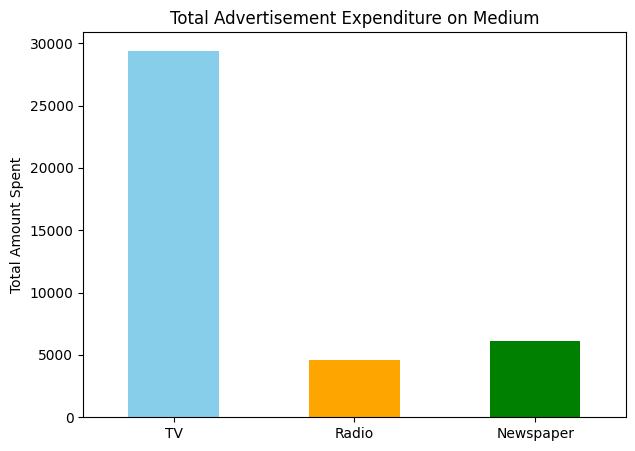

In [154]:
# Sum the total amount spent on each medium
totals = df[['TV', 'Radio', 'Newspaper']].sum()

# Plot as a bar plot
plt.figure(figsize=(7,5))
totals.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.ylabel('Total Amount Spent')
plt.title('Total Advertisement Expenditure on Medium')
plt.xticks(rotation=0)
plt.show()

# Question 1
##### 1.	What is the average amount spent on TV advertising in the dataset?

In [155]:
print("Average amount spent on TV advertising is ",df['TV'].mean())

Average amount spent on TV advertising is  147.0425


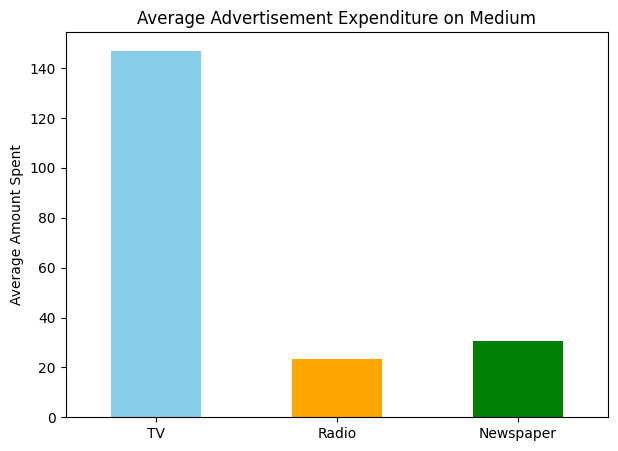

In [156]:
# Sum average amount spent on each medium
average = df[['TV', 'Radio', 'Newspaper']].mean()

# Plot as a bar plot
plt.figure(figsize=(7,5))
average.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.ylabel('Average Amount Spent')
plt.title('Average Advertisement Expenditure on Medium')
plt.xticks(rotation=0)
plt.show()

# Question 2
##### 2.	What is the correlation between radio advertising expenditure and product sales?

In [157]:
correlation = df['Radio'].corr(df['Sales'])
print("Correlation between radio advertising expenditure and product sales is:", correlation)

Correlation between radio advertising expenditure and product sales is: 0.34972771292078386


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.056648  0.901208
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.056648  0.354987   1.000000  0.157960
Sales      0.901208  0.349728   0.157960  1.000000


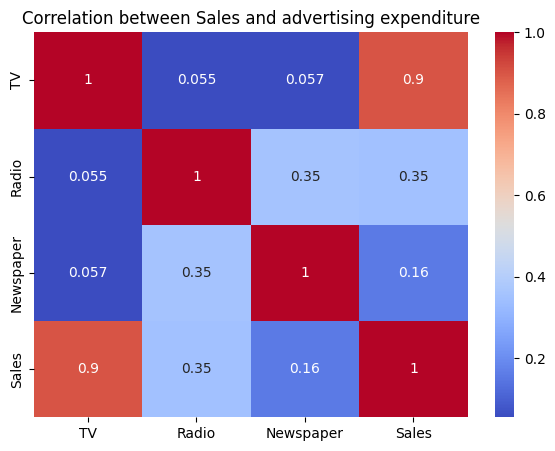

In [172]:
# Correlation matrix for for different Medium
medium = df[['TV', 'Radio', 'Newspaper','Sales']]
correlation_matrix = medium.corr()
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Sales and advertising expenditure")
plt.show()

# Question 3 
##### 3.	Which advertising medium has the highest impact on sales based on the dataset?

In [159]:
correlations = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlations['Sales'].drop('Sales'))

TV           0.901208
Radio        0.349728
Newspaper    0.157960
Name: Sales, dtype: float64


# Question 4
##### 4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [160]:
y_test.shape

(40,)

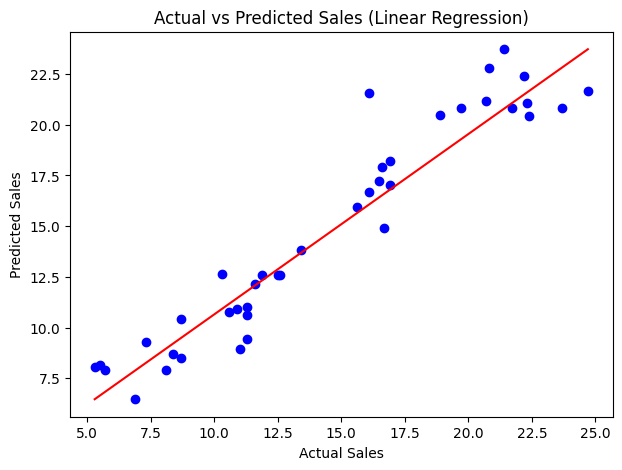

In [161]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)
y_pred.shape

# Plot actual vs predicted sales
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color = 'red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

In [162]:
X_test.shape

(40, 3)

In [163]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R2 score: 0.9059117026092903
Mean Squared Error: 2.9074318865000572
Mean Absolute Error: 1.2747707135511095


In [164]:
lr.coef_

array([0.05450899, 0.10096678, 0.00431997])

# Question 5
##### 5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [165]:
new_data = [[40, 200, 50]]
predicted_sales = lr.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 27.30429579695334


# Question 6
##### 6.	How does the performance of the linear regression model change when the dataset is normalized?

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Normalize features
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

# Train model on normalized data
lr_norm1 = LinearRegression()
lr_norm1.fit(X_train_scaled1, y_train)
y_pred_norm1 = lr_norm1.predict(X_test_scaled1)

# Evaluate performance
print("R2 score (standardized):", r2_score(y_test, y_pred_norm1))
print("MSE (standardized):", mean_squared_error(y_test, y_pred_norm1))
print("MAE (standardized):", mean_absolute_error(y_test, y_pred_norm1),"\n")


# Normalize features
scaler1 = MinMaxScaler()
X_train_scaled2 = scaler1.fit_transform(X_train)
X_test_scaled2 = scaler1.transform(X_test)

# Train model on normalized data
lr_norm2 = LinearRegression()
lr_norm2.fit(X_train_scaled1, y_train)
y_pred_norm2 = lr_norm2.predict(X_test_scaled1)

# Evaluate performance
print("R2 score (normalized):", r2_score(y_test, y_pred_norm2))
print("MSE (normalized):", mean_squared_error(y_test, y_pred_norm2))
print("MAE (normalized):", mean_absolute_error(y_test, y_pred_norm2))

R2 score (standardized): 0.9059117026092904
MSE (standardized): 2.9074318865000555
MAE (standardized): 1.2747707135511095 

R2 score (normalized): 0.9059117026092904
MSE (normalized): 2.9074318865000555
MAE (normalized): 1.2747707135511095


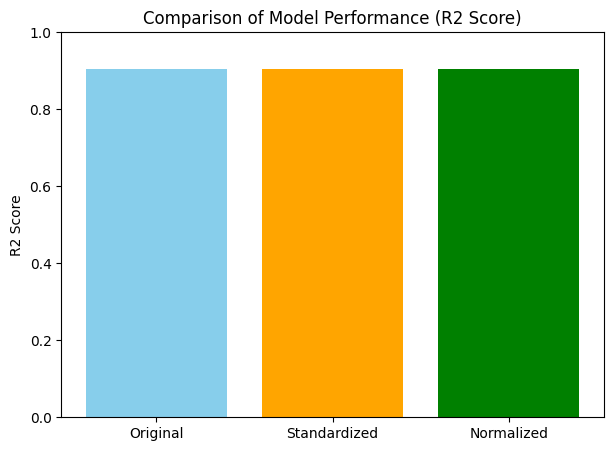

In [167]:
# Calculate R2 scores for all three models
r2_original = r2_score(y_test, y_pred)
r2_standardized = r2_score(y_test, y_pred_norm1)
r2_normalized = r2_score(y_test, y_pred_norm2)

# Bar plot to compare R2 scores
plt.figure(figsize=(7,5))
plt.bar(['Original', 'Standardized', 'Normalized'], [r2_original, r2_standardized, r2_normalized], color=['skyblue', 'orange', 'green'])
plt.ylabel('R2 Score')
plt.title('Comparison of Model Performance (R2 Score)')
plt.ylim(0, 1)
plt.show()

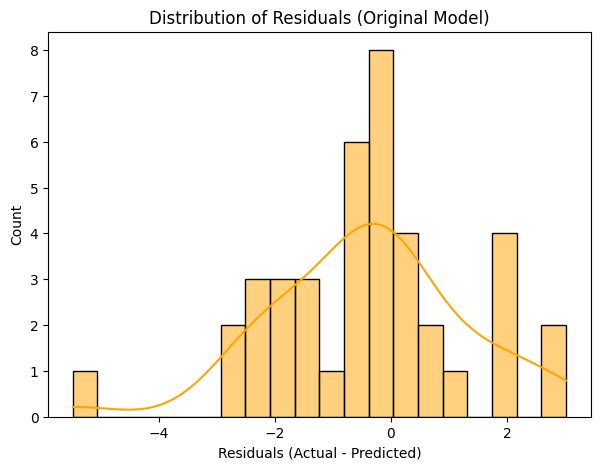

In [168]:
import seaborn as sns

# Calculating residuals
residuals = y_test - y_pred

# Plotting histogram and KDE of residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color='orange', bins=20)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Distribution of Residuals (Original Model)')
plt.show()

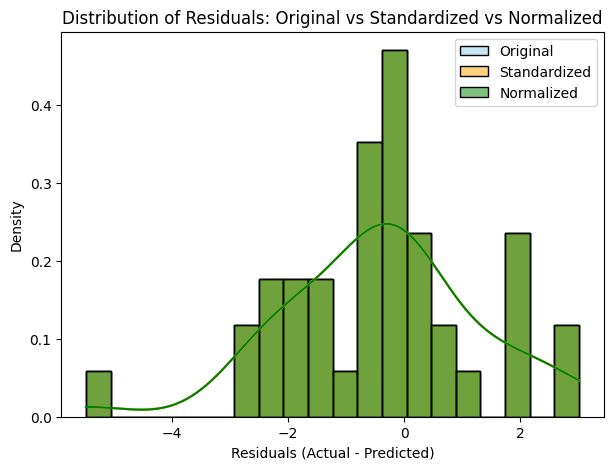

In [169]:
import seaborn as sns

# Calculating residuals for each model
residuals_original = y_test - y_pred
residuals_standardized = y_test - y_pred_norm1
residuals_normalized = y_test - y_pred_norm2

plt.figure(figsize=(7,5))
sns.histplot(residuals_original, kde=True, color='skyblue', bins=20, label='Original', stat='density')
sns.histplot(residuals_standardized, kde=True, color='orange', bins=20, label='Standardized', stat='density')
sns.histplot(residuals_normalized, kde=True, color='green', bins=20, label='Normalized', stat='density')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Distribution of Residuals: Original vs Standardized vs Normalized')
plt.legend()
plt.show()

Linear regression is not affected by feature scaling (normalization or standardization) in terms of predictions and metrics like R2, MSE, and MAE.

The model automatically adjusts its coefficients to account for the scale of each feature.

So, normalizing the features does not change the predictions or the fit for standard linear regression.

# Question 7
##### 7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [170]:
from sklearn.impute import SimpleImputer

# Select features and target
X2 = df[['Radio', 'Newspaper']]
y2 = df['Sales']

# Impute missing values in X2
imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2)

# Split the data
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_imputed, y2, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

# Predict and evaluate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y2_pred = lr2.predict(X2_test)

print("R2 score (Radio & Newspaper only):", r2_score(y2_test, y2_pred))
print("MSE (Radio & Newspaper only):", mean_squared_error(y2_test, y2_pred))
print("MAE (Radio & Newspaper only):", mean_absolute_error(y2_test, y2_pred))

R2 score (Radio & Newspaper only): 0.10998637077378093
MSE (Radio & Newspaper only): 27.502400158082317
MAE (Radio & Newspaper only): 4.582659422708265


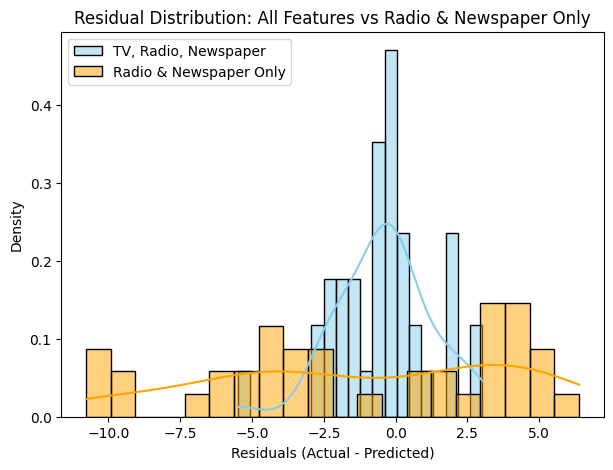

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals for both models
residuals_all = y_test - y_pred                # TV, Radio, Newspaper
residuals_rn = y2_test - y2_pred               # Radio, Newspaper only

plt.figure(figsize=(7,5))
sns.histplot(residuals_all, kde=True, color='skyblue', bins=20, label='TV, Radio, Newspaper', stat='density')
sns.histplot(residuals_rn, kde=True, color='orange', bins=20, label='Radio & Newspaper Only', stat='density')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residual Distribution: All Features vs Radio & Newspaper Only')
plt.legend()
plt.show()